<a href="https://colab.research.google.com/github/yyoonyoon/201935291-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# 초기 작업 / 분석**

In [288]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.impute import SimpleImputer
# -*- coding: utf-8 -*-

#Import Files
titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

#차트 그리는 함수 정의
def chart(datafile, feature):
    survived = datafile[datafile['Survived'] == 1][feature].value_counts()
    dead = datafile[datafile['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df = df.sort_index(axis=1, ascending=True)  # 인덱스를 오름차순으로 정렬
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=False)

#차트 테마 설정
plt.style.use('Solarize_Light2')
plt.rcParams['text.color'] = 'black'

# data = titanic[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].to_numpy()
# target = titanic['Survived'].to_numpy()

In [289]:
#데이터의 전반적인 구조파악 => titanic 이 892부터 1309번 승객의 생존여부에 대한 정답지인 것을 알 수 있음.
print(titanic.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [290]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [291]:
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [292]:
# info() 메서드를 사용하여 데이터 파일의 정보를 읽어보았다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [293]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


train세트에는 891의 항목이, test세트에는 418의 항목이 존재하는데,
Age 와 Cabin 의 데이터의 개수가 크게 다른 것으로 보아 Age와 Cabin에 Nan 데이터가 존재.
또한 훈련세트와 테스트세트의 차이점은 Survived 컬럼의 유무. 이로인해 내가 예측해야 할 타겟은 '생존여부'임을 알 수 있음.

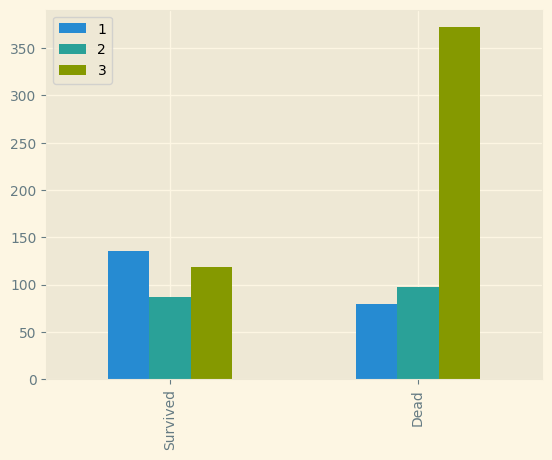

In [294]:
Pclass_sorted = train.sort_values(by='Pclass', ascending=True)
# print(Pclass_sorted)
# Pclass 에 따른 생존율 그래프화
chart(Pclass_sorted, 'Pclass')

     PassengerId  Survived  Pclass  \
383          384         1       1   
218          219         1       1   
609          610         1       1   
216          217         1       3   
215          216         1       1   
..           ...       ...     ...   
371          372         0       3   
372          373         0       3   
373          374         0       1   
360          361         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
383  Holverson, Mrs. Alexander Oskar (Mary Aline To...  female  35.0      1   
218                              Bazzani, Miss. Albina  female  32.0      0   
609                          Shutes, Miss. Elizabeth W  female  40.0      0   
216                             Honkanen, Miss. Eliina  female  27.0      0   
215                            Newell, Miss. Madeleine  female  31.0      1   
..                                                 ...     ...   ... 

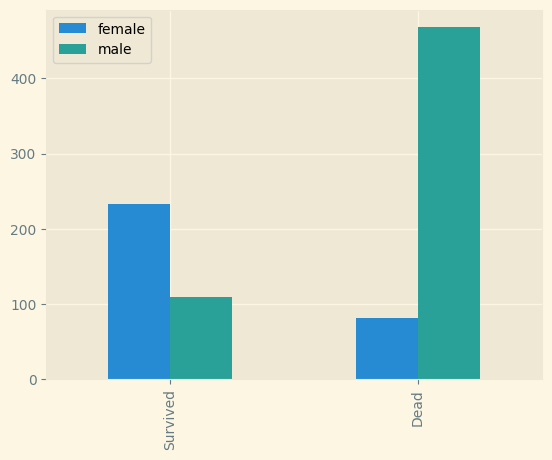

In [295]:
#성별에 따른 생존율 그래프화
Sex_sorted = train.sort_values(by='Sex')
print(Sex_sorted)
chart(Sex_sorted, 'Sex')

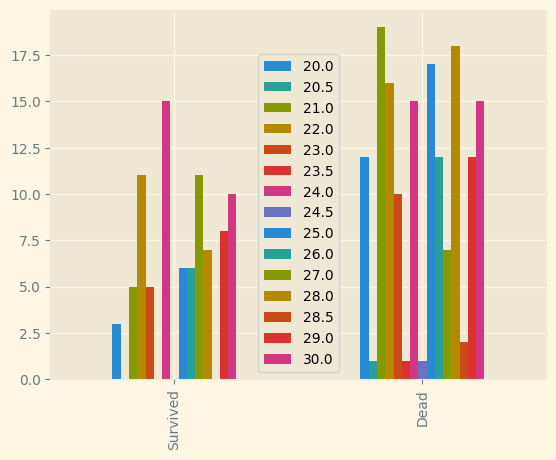

In [296]:
#20세에서 30세 사이의 연령대의 생존유무 알아보기
age_filtered = train[(train['Age'] >= 20) & (train['Age'] <= 30)]
Age_sorted = age_filtered.sort_values(by='Age', ascending = True)
# print(Age_sorted)
chart(Age_sorted, 'Age')

     PassengerId  Survived  Pclass  \
779          780         1       1   
730          731         1       1   
689          690         1       1   
377          378         0       1   
527          528         0       1   
716          717         1       1   
380          381         1       1   
557          558         0       1   
700          701         1       1   
118          119         0       1   
299          300         1       1   
311          312         1       1   
742          743         1       1   
27            28         0       1   
88            89         1       1   
341          342         1       1   
438          439         0       1   

                                                  Name     Sex   Age  SibSp  \
779  Robert, Mrs. Edward Scott (Elisabeth Walton Mc...  female  43.0      0   
730                      Allen, Miss. Elisabeth Walton  female  29.0      0   
689                  Madill, Miss. Georgette Alexandra  female  15.0      0   

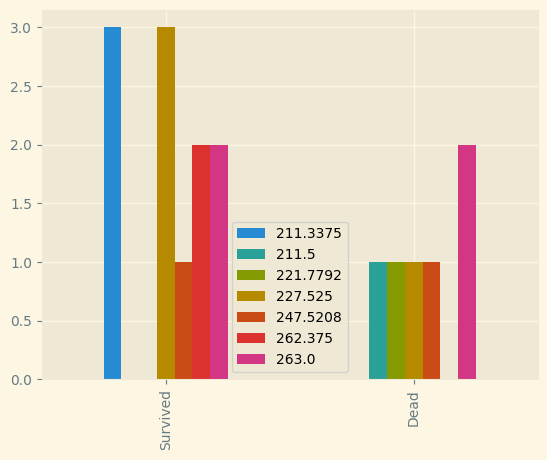

In [297]:
# 200~250의 티켓값을 낸 사람들의 생존 여부 그래프화
fare_filterd = train[(train["Fare"] > 200) & (train["Fare"] <=300)]
fare_sorted = fare_filterd.sort_values(by="Fare", ascending=True)
print(fare_sorted)
chart(fare_sorted, "Fare")

     PassengerId  Survived  Pclass                                       Name  \
258          259         1       1                           Ward, Miss. Anna   
125          126         1       3               Nicola-Yarred, Master. Elias   
354          355         0       3                          Yousif, Mr. Wazli   
352          353         0       3                         Elias, Mr. Tannous   
128          129         1       3                          Peter, Miss. Anna   
..           ...       ...     ...                                        ...   
355          356         0       3                Vanden Steen, Mr. Leo Peter   
344          345         0       2                    Fox, Mr. Stanley Hubert   
445          446         1       1                  Dodge, Master. Washington   
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  P

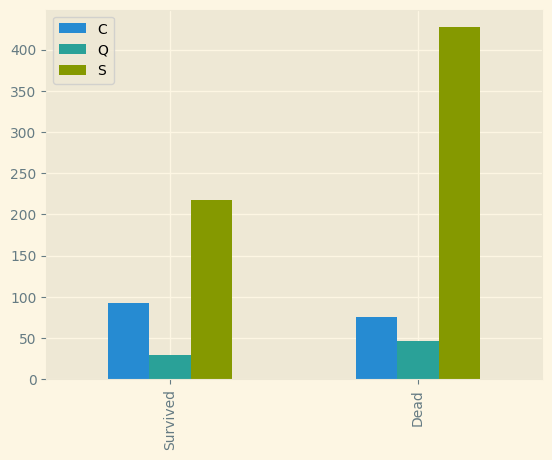

In [298]:
# 탑승지에 따른 생존 여부 그래프화
embarked_sorted = train.sort_values(by="Embarked")
print(embarked_sorted)
chart(embarked_sorted, "Embarked")

# 모델 생성 및 학습을 위한 **전처리**

In [299]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# 종속변수(Survived)와 독립변수(나머지 컬럼들) drop 메서드로 분리
X_train = train.drop("Survived", axis=1) #독립변수
y_train = train["Survived"] #종속변수

# 데이터 전처리
scaler = StandardScaler()
numerical_X_train = X_train.select_dtypes(include=['number'])
X_train_scaled = scaler.fit_transform(numerical_X_train)

imputer = SimpleImputer(strategy="median")  # 결측값 중앙값으로 대체

# SGD **분류**

In [300]:
# 모델 생성 및 학습
X_train_scaled = imputer.fit_transform(X_train_scaled)
sgd_model = SGDClassifier(random_state=201935291)
sgd_model.fit(X_train_scaled, y_train)

# 예측 및 평가
# 모델의 정확도
y_pred = sgd_model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print("SGD 분류 정확도:", accuracy)

SGD 분류 정확도: 0.675645342312009


# 결정트리 **분류**

결정 트리 정확도: 1.0


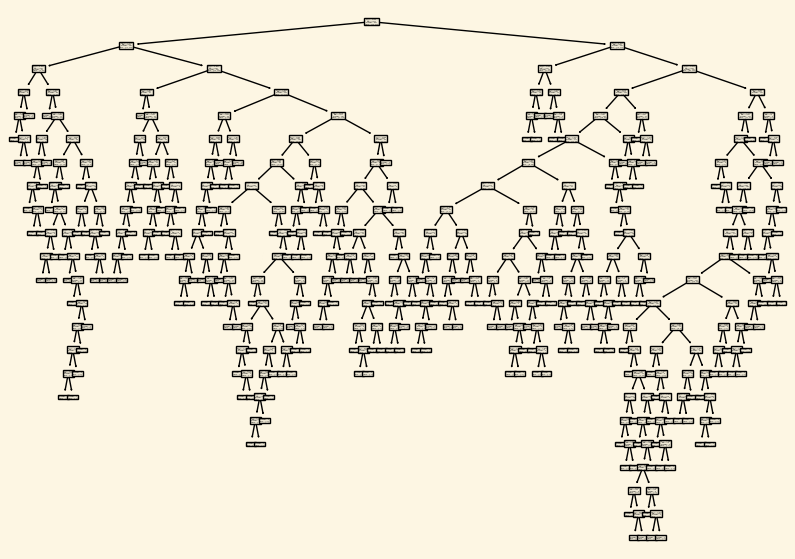

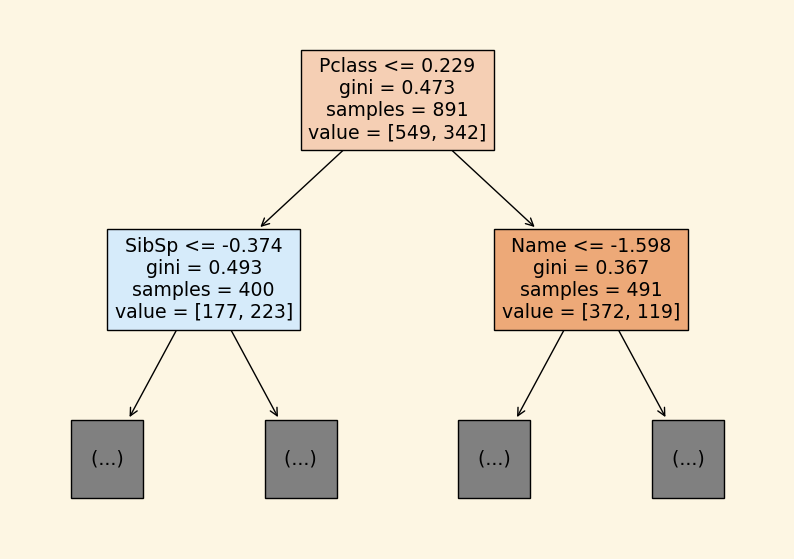

In [301]:
# 모델 생성 및 학습
tree_model = DecisionTreeClassifier(random_state=201935291)
tree_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = tree_model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print("결정 트리 정확도:", accuracy)

# 결정트리 모델 그래프그리기
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(tree_model)
plt.show()

plt.figure(figsize=(10,7))
plot_tree(tree_model, max_depth=1, filled=True, feature_names=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
plt.show()

# **랜덤포레스트**

In [302]:
# 모델 생성 및 학습
random_model = RandomForestClassifier(random_state=201935291)
random_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = random_model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print("랜덤 포레스트 정확도:", accuracy)

랜덤 포레스트 정확도: 1.0


# 히스토그램기반 그래디언트 **부스팅**

히스토그램 기반 그래디언트 부스팅 정확도: 0.9696969696969697


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44191 (\N{HANGUL SYLLABLE GES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

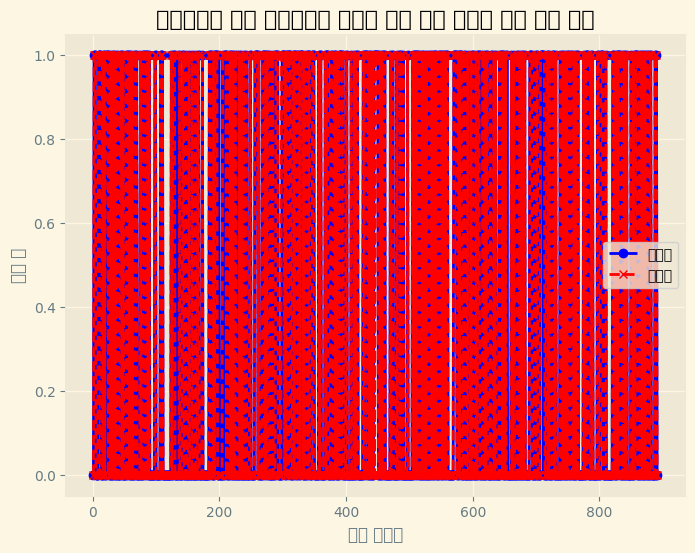

In [304]:
# 모델 생성 및 학습
histogram_model = HistGradientBoostingClassifier(random_state=201935291)
histogram_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = histogram_model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print("히스토그램 기반 그래디언트 부스팅 정확도:", accuracy)